In [12]:
import pandas as pd

### Download data of corona affected cases in pakistan and upload it on jupiter notebook

In [89]:
df= pd.read_csv('PK COVID-19-10may (1).csv',index_col = 'Date')
df.head(10)

,Cases,Deaths,Recovered,Travel_history,Province,City
Date,,,,,,
2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
3/6/2020,0,0,1,Unknown,Sindh,Karachi
3/7/2020,1,0,0,Iran/Taftan,Sindh,Karachi
3/9/2020,6,0,0,Syria,Sindh,Karachi
3/9/2020,3,0,0,UK,Sindh,Karachi


### Find total number through loop and then average of it per month

In [40]:
total_cases=0
for i in df['Cases']:
    total_cases = total_cases+i

print("Total Cases : ",total_cases)

Total Cases :  30076


In [41]:
avg = total_cases/2 #2 month data
print("Average : ",avg)

Average :  15038.0


### how many cases in provinces and cities

In [42]:
df.groupby('Province')[['Cases']].count().to_dict()

{'Cases': {'Azad Jummu Kashmir': 30,
  'Baluchistan': 59,
  'Federal Administration Tribal Area': 36,
  'Gilgit-Baltistan': 80,
  'Islamabad Capital Territory': 40,
  'Khyber Pakhtunkhwa': 513,
  'Punjab': 317,
  'Sindh': 241,
  'islamabad Capital Territory': 10,
  'khyber Pakhtunkhwa': 2}}

In [204]:
big_city = ['Karachi','Lahore','islamabad Capital Territory','Quetta','Multan','Faisalabad','Hyderabad']
city = df.groupby('City')[['Cases']].count()
city.loc[big_city].to_dict()

c:\users\modi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


{'Cases': {'Karachi': 71.0,
  'Lahore': 61.0,
  'islamabad Capital Territory': nan,
  'Quetta': 54.0,
  'Multan': 18.0,
  'Faisalabad': 15.0,
  'Hyderabad': 20.0}}

### How many deaths recoveries

In [44]:
recov = df['Recovered'].sum()
print("Total recovered : ", recov)

Total recovered :  3277


In [45]:
df[['Cases','Province']][0:5]

,Cases,Province
0,1,Islamabad Capital Territory
1,2,Sindh
2,1,Islamabad Capital Territory
3,1,Sindh
4,1,Gilgit-Baltistan


In [46]:
g = df[['Cases','Province']][0:10].to_dict('records')
g

[{'Cases': 1, 'Province': 'Islamabad Capital Territory'},
 {'Cases': 2, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Islamabad Capital Territory'},
 {'Cases': 1, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Gilgit-Baltistan'},
 {'Cases': 0, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Sindh'},
 {'Cases': 6, 'Province': 'Sindh'},
 {'Cases': 3, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Sindh'}]

In [47]:
import itertools
from operator import itemgetter
a= 0
e = {}
students = [{'Cases': 1, 'Province': 'Islamabad Capital Territory'},
 {'Cases': 2, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Islamabad Capital Territory'},
 {'Cases': 1, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Gilgit-Baltistan'},
 {'Cases': 0, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Sindh'},
 {'Cases': 6, 'Province': 'Sindh'},
 {'Cases': 3, 'Province': 'Sindh'},
 {'Cases': 1, 'Province': 'Sindh'}]
 
# Sort students data by `class` key.
students = sorted(students, key=itemgetter('Province'))
 
# Display data grouped by `class`
for key, value in itertools.groupby(students, key=itemgetter('Province')):
    print(key)
    for i in value:
        print(i.get('Cases'))
        e = {key:i.get('Cases')}
        e.update(e)
#         a = a + i.get('Cases')
#         print(a)

Gilgit-Baltistan
1
Islamabad Capital Territory
1
1
Sindh
2
1
0
1
6
3
1


In [48]:
e

{'Sindh': 1}

In [49]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
1323,5/10/2020,709,8,29,Local - Social Contact,Sindh,Karachi
1324,5/10/2020,59,0,0,Local - Social Contact,Baluchistan,Quetta
1325,5/10/2020,12,0,1,Local - Social Contact,Gilgit-Baltistan,Gilgit
1326,5/10/2020,160,11,40,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar


In [196]:
provinces = list(df['Province'].unique())
pc = {}
for p in provinces:
    pc[p] = df[df['Province'] == p]['Cases'].sum()

In [197]:
pc

{'Islamabad Capital Territory': 318,
 'Sindh': 11428,
 'Gilgit-Baltistan': 442,
 'Baluchistan': 1918,
 'Punjab': 11085,
 'Khyber Pakhtunkhwa': 4416,
 'khyber Pakhtunkhwa': 2,
 'Azad Jummu Kashmir': 86,
 'Federal Administration Tribal Area': 53,
 'islamabad Capital Territory': 328}

In [168]:
df.groupby('Province')['Cases'].sum()

Province
Azad Jummu Kashmir                       86
Baluchistan                            1918
Federal Administration Tribal Area       53
Gilgit-Baltistan                        442
Islamabad Capital Territory             318
Khyber Pakhtunkhwa                     4416
Punjab                                11085
Sindh                                 11428
islamabad Capital Territory             328
khyber Pakhtunkhwa                        2
Name: Cases, dtype: int64

In [169]:
provinces_cases = df.groupby('Province')[['Cases']].sum().to_dict()['Cases']

In [170]:
provinces_cases

{'Azad Jummu Kashmir': 86,
 'Baluchistan': 1918,
 'Federal Administration Tribal Area': 53,
 'Gilgit-Baltistan': 442,
 'Islamabad Capital Territory': 318,
 'Khyber Pakhtunkhwa': 4416,
 'Punjab': 11085,
 'Sindh': 11428,
 'islamabad Capital Territory': 328,
 'khyber Pakhtunkhwa': 2}

In [209]:

big_citites = {}
for b in big_city:
    big_citites[b] = df[df['City'] == b]['Cases'].sum()

In [210]:
big_citites

{'Karachi': 9852,
 'Lahore': 8004,
 'islamabad Capital Territory': 0,
 'Quetta': 1902,
 'Multan': 712,
 'Faisalabad': 77,
 'Hyderabad': 281}

In [172]:
#Cases in Big Cities 1328
df.groupby('City')['Recovered'].sum()[big_city].to_frame()

,Recovered
City,
Karachi,813
Lahore,398
Islamabad,15
Quetta,202
Multan,1
Faisalabad,0
Hyderabad,161


In [173]:
#Cases in Big Cities
df.groupby('City')['Deaths'].sum()[big_city].to_frame()

,Deaths
City,
Karachi,176
Lahore,169
Islamabad,4
Quetta,24
Multan,2
Faisalabad,0
Hyderabad,3


### Visualization

In [246]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

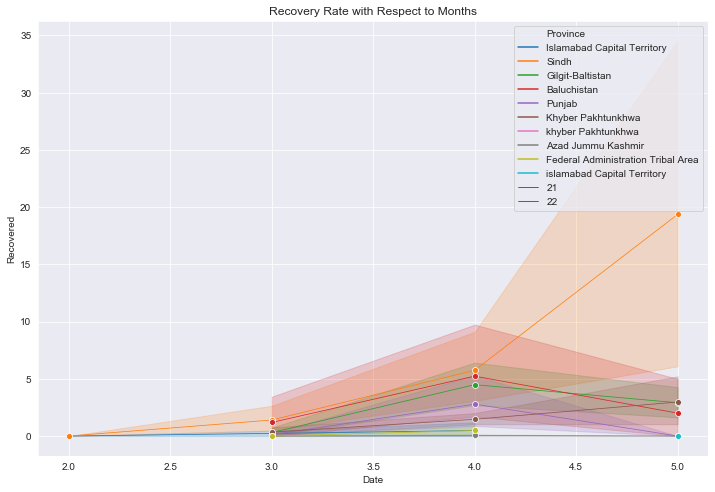

In [247]:

df.index = pd.to_datetime(df.index) #converting object into date time
plt.figure(figsize = (12,8))
plt.title('Recovery Rate with Respect to Months')
sns.lineplot(x=df.index.month,y = df['Recovered'],marker = 'o',size=22,hue = 'Province',data=df,)

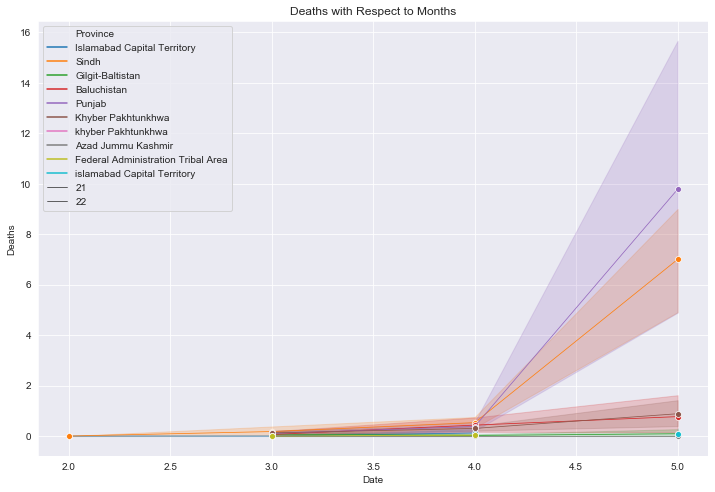

In [248]:

df.index = pd.to_datetime(df.index) #converting object into date time
plt.figure(figsize = (12,8))
plt.title('Deaths with Respect to Months')
sns.lineplot(x=df.index.month,y = df['Deaths'],marker = 'o',size=22,hue = 'Province',data=df,)

### Counts by Province


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

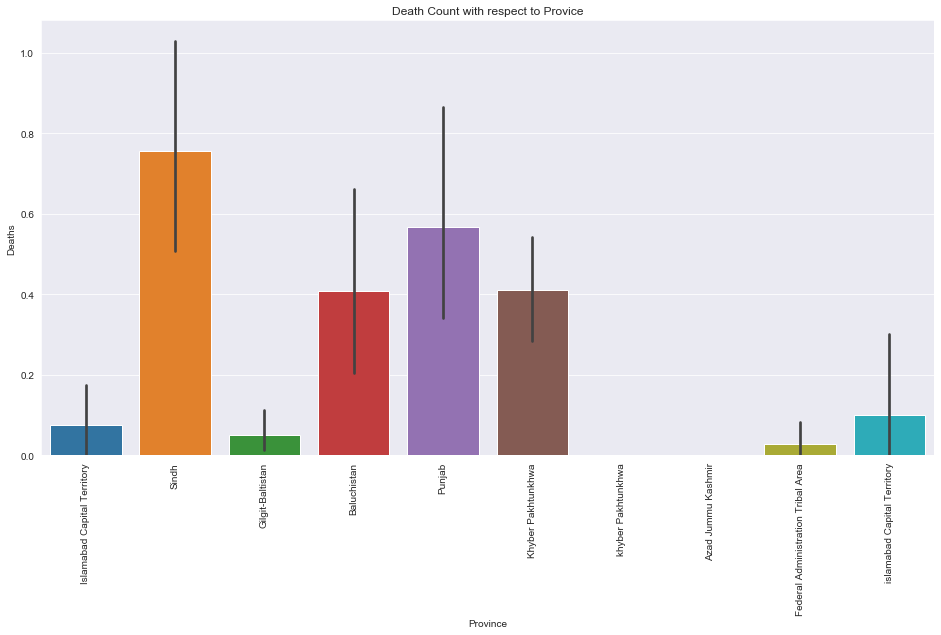

In [249]:
plt.figure(figsize = (16,8))
sns.barplot(x = df.Province, y = df.Deaths)
plt.title('Death Count with respect to Provice')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

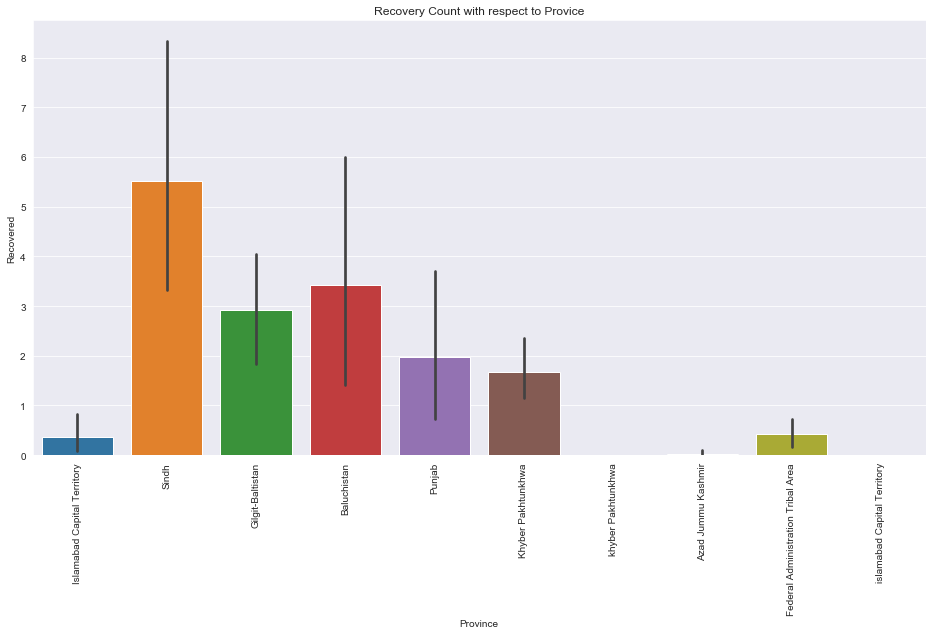

In [250]:
plt.figure(figsize = (16,8))
sns.barplot(x = df.Province, y = df.Recovered)
plt.title('Recovery Count with respect to Provice')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

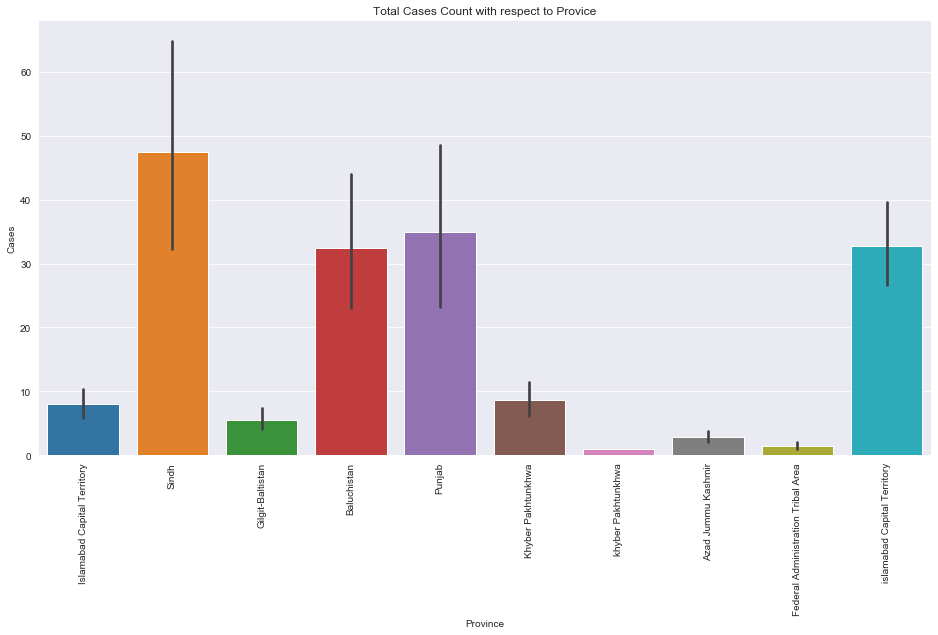

In [251]:
plt.figure(figsize = (16,8))
sns.barplot(x = df.Province, y = df.Cases)
plt.title('Total Cases Count with respect to Provice')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Total Deaths Count with respect to Months')

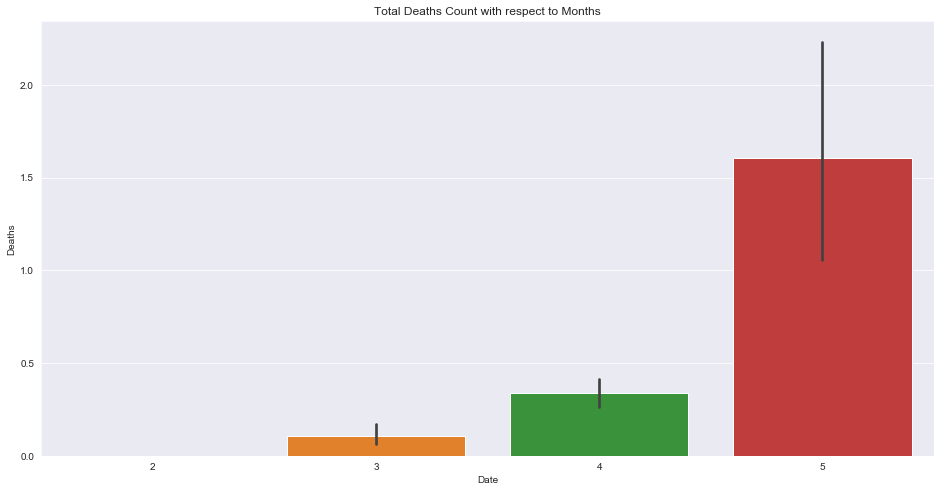

In [252]:
plt.figure(figsize = (16,8))
sns.barplot(x = df.index.month, y = df.Deaths)
plt.title('Total Deaths Count with respect to Months')

Text(0.5, 1.0, 'Total Recovery Count with respect to Months')

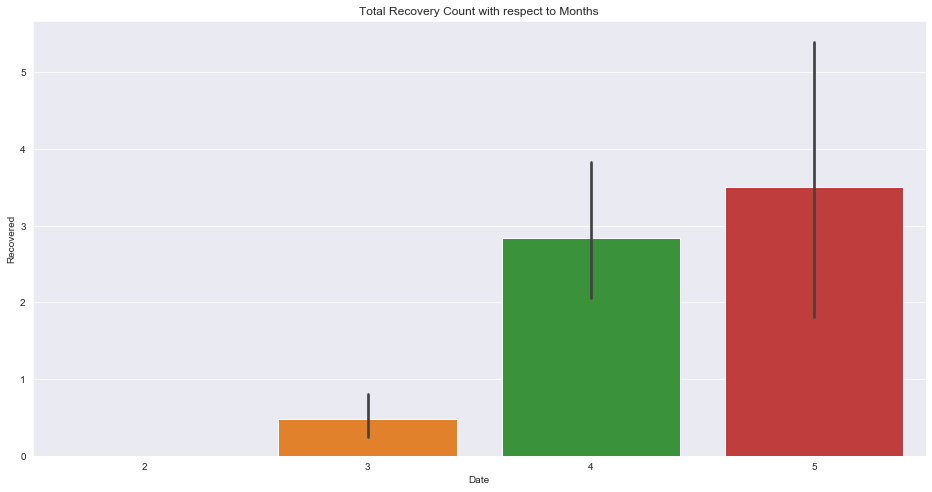

In [253]:
plt.figure(figsize = (16,8))
sns.barplot(x = df.index.month, y = df.Recovered)
plt.title('Total Recovery Count with respect to Months')

Text(0.5, 1.0, 'Total Cases Count with respect to Months')

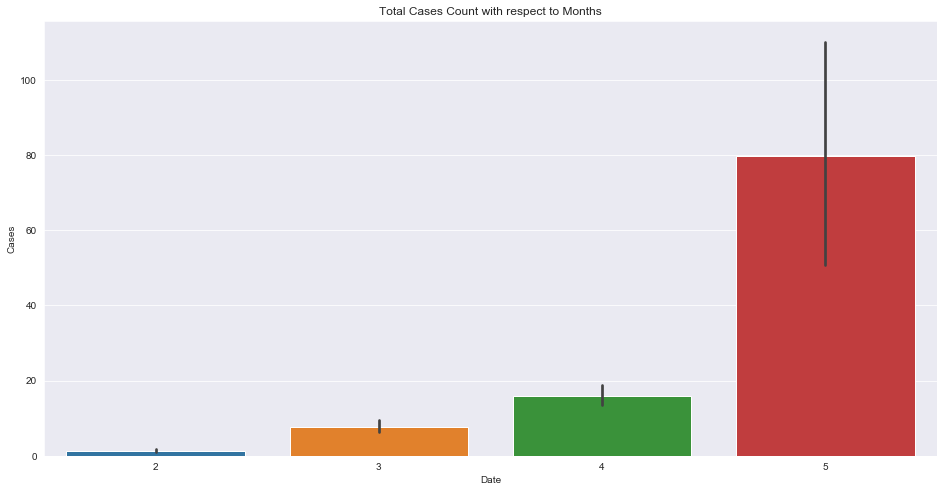

In [254]:
plt.figure(figsize = (16,8))
sns.barplot(x = df.index.month, y = df.Cases)
plt.title('Total Cases Count with respect to Months')

Text(0.5, 1.0, 'Total Cases Count with respect to Travel History')

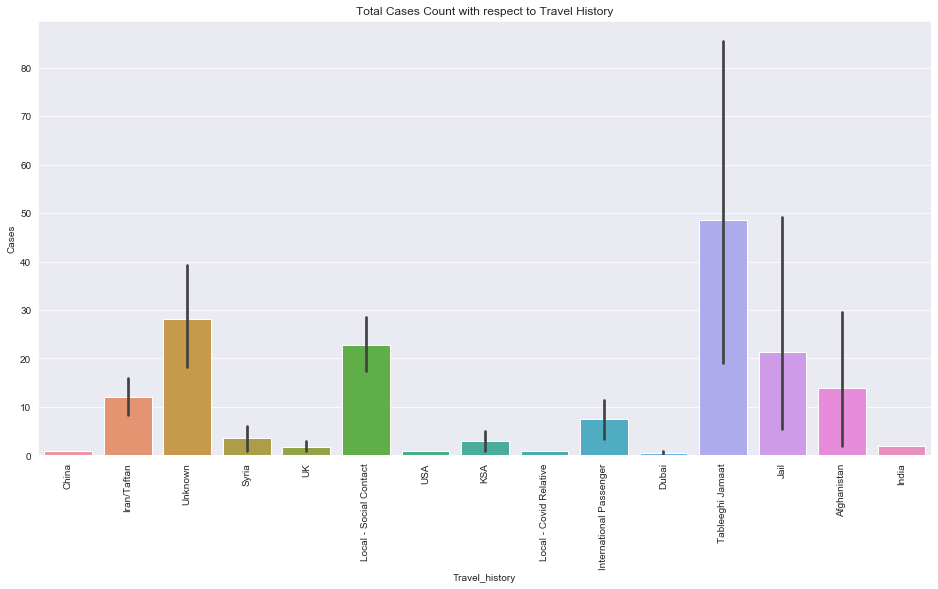

In [255]:
plt.figure(figsize = (16,8))
sns.barplot(x = df.Travel_history, y = df.Cases)
plt.xticks(rotation = 90)
plt.title('Total Cases Count with respect to Travel History')

### Cases Rate in In Big Cities

In [256]:
bigCityCase = df.loc[df['City'].isin(big_city)]
bigCityCase

,Cases,Deaths,Recovered,Travel_history,Province,City
Date,,,,,,
2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi
2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi
2020-03-06,0,0,1,Unknown,Sindh,Karachi
2020-03-07,1,0,0,Iran/Taftan,Sindh,Karachi
2020-03-09,6,0,0,Syria,Sindh,Karachi
...,...,...,...,...,...,...
2020-05-09,1080,5,0,Local - Social Contact,Sindh,Karachi
2020-05-09,151,0,13,Local - Social Contact,Baluchistan,Quetta
2020-05-10,0,0,0,Local - Social Contact,Punjab,Lahore


Text(0.5, 1.0, 'Total Cases Count in KARACHI with respect to Date')

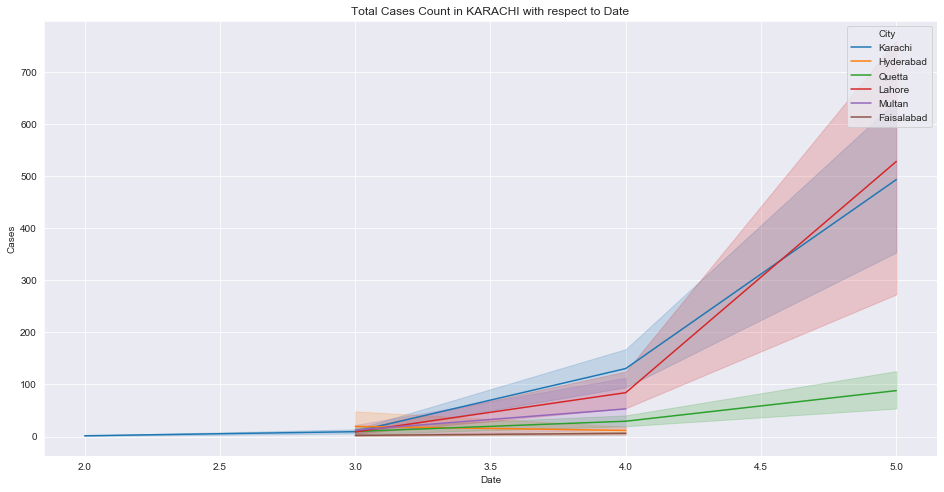

In [257]:
plt.figure(figsize = (16,8))
sns.lineplot(x = bigCityCase.index.month, y = bigCityCase.Cases,hue = 'City',data=bigCityCase)
plt.title('Total Cases Count in KARACHI with respect to Date')